In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df_stream=pd.DataFrame()
for i in range(7):
    df_stream0= pd.read_json(f'stmhist/StreamingHistory{i}.json')
    df_stream= pd.concat([df_stream, df_stream0])
df_stream['albumName'] = df_stream['artistName'] + ":" + df_stream['trackName']
df_stream.head()

,endTime,artistName,trackName,msPlayed,albumName
0,2022-11-08 05:23,Pritam,Deva Deva,160010,Pritam:Deva Deva
1,2022-11-10 02:30,Pritam,Khairiyat,1307,Pritam:Khairiyat
2,2022-11-10 02:34,Jason Derulo,Take You Dancing,190306,Jason Derulo:Take You Dancing
3,2022-11-10 02:38,Pritam,Khairiyat,280281,Pritam:Khairiyat
4,2022-11-10 02:38,Maroon 5,Sugar,4927,Maroon 5:Sugar


In [5]:
tracks = [] 
for i in range(7):
    with open(f"library\YourLibrary{i}.json", encoding='utf-8') as file:
        json_data = json.load(file)
        tracks += json_data['tracks']

In [6]:
# dataframe for Top 5 Artists of All Time (2022-2023)

top_artists_all_time = df_stream['artistName'].value_counts().reset_index()
top_artists_all_time.columns = ['Artist', 'Total Streams']

df_stream['minutesPlayed'] = df_stream['msPlayed'] / (1000 * 60)  # Convert milliseconds to minutes
total_minutes_all_time = df_stream.groupby('artistName')['minutesPlayed'].sum().reset_index()
total_minutes_all_time.columns = ['Artist', 'Total Minutes']
top_artists_all_time = pd.merge(top_artists_all_time, total_minutes_all_time, on='Artist')
top_artists_all_time.sort_values('Total Streams', ascending=False, inplace=True)

print("Top Artists of All Time:")
print(top_artists_all_time.head(5))

Top Artists of All Time:
                Artist  Total Streams  Total Minutes
0           The Weeknd            904    2219.458900
1  Anirudh Ravichander            623    1509.179467
2         Dominic Fike            426     612.887467
3           Fujii Kaze            278     708.295467
4         Arijit Singh            267    1049.754850


In [7]:
# dataframe for Top 10 Artists per Year

df_stream['endTime'] = pd.to_datetime(df_stream['endTime'])
df_stream['year'] = df_stream['endTime'].dt.year
top_artists_per_year_dfs = []

for year in df_stream['year'].unique():
    df_stream_year = df_stream[df_stream['year'] == year]
    top_artists_year = df_stream_year['artistName'].value_counts().reset_index()
    top_artists_year.columns = ['Artist', 'Total Streams']

    df_stream_year.loc[:, 'minutesPlayed'] = df_stream_year['msPlayed'] / (1000 * 60) # Convert milliseconds to minutes
    total_minutes_year = df_stream_year.groupby('artistName')['minutesPlayed'].sum().reset_index()
    total_minutes_year.columns = ['Artist', 'Total Minutes']

  
    top_artists_year = pd.merge(top_artists_year, total_minutes_year, on='Artist')
    top_artists_year.sort_values('Total Streams', ascending=False, inplace=True)
    top_artists_per_year_dfs.append(top_artists_year)

# Displaying the top artists per year for 2022 and 2023 
for year, df in zip(df_stream['year'].unique(), top_artists_per_year_dfs):
    print(f"Top Artists of {year}:")
    print(df.head(10))
    print()

Top Artists of 2022:
                Artist  Total Streams  Total Minutes
0           The Weeknd            139     323.540450
1  Anirudh Ravichander             67     160.128583
2         Selena Gomez             42     118.170883
3           Sid Sriram             38     111.434483
4          A.R. Rahman             36     135.938550
5         Yasser Desai             36     123.443183
6                 Alok             34      73.948817
7           Leon James             34      79.466850
8    Dhvani Bhanushali             32      77.185467
9               Pritam             31      79.363833

Top Artists of 2023:
                Artist  Total Streams  Total Minutes
0           The Weeknd            765    1895.918450
1  Anirudh Ravichander            556    1349.050883
2         Dominic Fike            426     612.887467
3           Fujii Kaze            267     669.677983
4         Arijit Singh            256    1031.456250
5          Alan Walker            232     582.515533
6  

In [8]:
# dataframe for Top Songs of All Time (2022-2023)
df_stream['endTime'] = pd.to_datetime(df_stream['endTime'])

df_stream['year'] = df_stream['endTime'].dt.year
top_songs_per_year_dfs = []

top_songs_all_time = df_stream.groupby(['artistName', 'trackName']).agg(TotalStreams=('trackName', 'count'),TotalMinutes=('msPlayed', lambda x: x.sum() / (1000 * 60)) ).reset_index()

top_songs_all_time.sort_values('TotalStreams', ascending=False, inplace=True)

# Displaying the top songs of all time
print("Top Songs of All Time (Ascending Order):")
print(top_songs_all_time.head(10))
print()

Top Songs of All Time (Ascending Order):
          artistName                   trackName  TotalStreams  TotalMinutes
2594      The Weeknd                     Starboy           204    648.943400
348     Arijit Singh                  Phir Kabhi           176    768.990750
885       Fujii Kaze              Shinunoga E-Wa           142    353.929033
2540      The Weeknd             Blinding Lights           140    370.340517
2520   The Kid LAROI   STAY (with Justin Bieber)           122    220.845567
2993              有華                    Baby you           116    264.648450
820           Eminem                 Mockingbird           108    283.864200
2266         Sickick            Intro (Infected)            94    326.694300
1097          JalRaj           Chidiya (Reprise)            92    332.967450
524   Camila Cabello  Bam Bam (feat. Ed Sheeran)            89    220.476350



In [9]:
# dataframe for Top Songs Per Year  
df_stream['endTime'] = pd.to_datetime(df_stream['endTime'])
df_stream['year'] = df_stream['endTime'].dt.year
top_songs_per_year_dfs = []
for year in df_stream['year'].unique():
    df_stream_year = df_stream[df_stream['year'] == year]
    top_songs_year = df_stream_year.groupby(['artistName', 'trackName']).agg(
        TotalStreams=('trackName', 'count'),
        TotalMinutes=('msPlayed', lambda x: x.sum() / (1000 * 60))  # Convert milliseconds to minutes
    ).reset_index()
    top_songs_year.sort_values('TotalStreams', ascending=False, inplace=True)
    top_songs_per_year_dfs.append(top_songs_year)

    # display the top songs of the current year
    print(f"Top Songs of {year} (Ascending Order):")
    print(top_songs_year.head(5))
    print()

Top Songs of 2022 (Ascending Order):
            artistName                             trackName  TotalStreams  \
635       Yasser Desai    Dil Ko Karaar Aaya (From "Sukoon")            36   
29                Alok              Headlights (feat. KIDDO)            32   
178  Dhvani Bhanushali                                Vaaste            32   
447            Rishabh  Tarasti Hain Nigaahain (Galat Fehmi)            29   
518         Sid Sriram  Kaadhal En Kaviye - From "Salmon 3D"            25   

     TotalMinutes  
635    123.443183  
29      68.839883  
178     77.185467  
447     25.053383  
518     79.008700  

Top Songs of 2023 (Ascending Order):
        artistName        trackName  TotalStreams  TotalMinutes
2452    The Weeknd          Starboy           196    618.613983
328   Arijit Singh       Phir Kabhi           175    764.200383
830     Fujii Kaze   Shinunoga E-Wa           139    343.586150
2398    The Weeknd  Blinding Lights           131    351.811800
2822            

In [10]:
# calculate total minutes per year
total_minutes_year = df_stream['msPlayed'].sum() / (1000 * 60)
print("Total Minutes on Spotify for the Year:", total_minutes_year)

Total Minutes on Spotify for the Year: 48610.30951666667


In [53]:
# calculate total minutes per month
df_stream['endTime'] = pd.to_datetime(df_stream['endTime'])
df_stream['month'] = df_stream['endTime'].dt.month

total_minutes_month = df_stream.groupby('month').agg(total_minutes=('msPlayed', 'sum')) / (1000 * 60)
print("Total Minutes on Spotify per Month:")
print(total_minutes_month)

Total Minutes on Spotify per Month:
       total_minutes
month               
1        5110.324117
2        5406.814033
3        4780.786033
4        3400.008667
5        2281.882633
6         769.351083
7        3193.235917
8        4849.015117
9        7964.920450
10       5025.055550
11       3557.231617
12       2271.684300


In [11]:
# calculate total minutes per day
df_stream['day'] = df_stream['endTime'].dt.date

total_minutes_day = df_stream.groupby('day').agg(total_minutes=('msPlayed', 'sum')) / (1000 * 60)
print("Total Minutes on Spotify per Day:")
print(total_minutes_day)

Total Minutes on Spotify per Day:
            total_minutes
day                      
2022-10-12      10.243300
2022-10-15       4.418833
2022-10-25     102.733433
2022-11-04       2.078583
2022-11-08       2.666833
...                   ...
2023-11-06     155.054450
2023-11-07      67.903950
2023-11-08     119.405967
2023-11-09     239.123650
2023-11-10     152.924000

[361 rows x 1 columns]


In [12]:
# calculate total minutes per week
df_stream['week'] = df_stream['endTime'].dt.isocalendar().week
total_minutes_week = df_stream.groupby('week').agg(total_minutes=('msPlayed', 'sum')) / (1000 * 60)
print("Total Minutes on Spotify per Week:")
print(total_minutes_week.head(5))

Total Minutes on Spotify per Week:
      total_minutes
week               
1        578.410617
2        700.783367
3       1326.750983
4       1571.507600
5       2066.128433


In [55]:
# Extract unique genres from track names
df_stream['genre'] = df_stream['trackName'].str.split('-', expand=True)[0].str.strip()
unique_genres = df_stream['genre'].nunique()
print("Unique Genres:", unique_genres)

Unique Genres: 2850


In [16]:
unique_tracks = df_stream['trackName'].nunique()
unique_albums = df_stream['albumName'].nunique()
unique_artists = df_stream['artistName'].nunique()

print("Unique Tracks:", unique_tracks)
print("Unique Albums:", unique_albums)
print("Unique Artists:", unique_artists) 

Unique Tracks: 2928
Unique Albums: 3000
Unique Artists: 1130


In [79]:
print(df_stream.columns)

Index(['endTime', 'artistName', 'trackName', 'msPlayed', 'albumName',
       'minutesPlayed', 'year', 'month', 'day', 'genre'],
      dtype='object')


In [17]:
import pandas
df_stream.to_csv('spotify.csv', index=False)

In [18]:
import os

file_path = 'spotify.csv'
if os.path.exists(file_path):
    print("CSV file was created successfully.")
else:
    print("CSV file was not found.")

CSV file was created successfully.


In [19]:
df=pd.read_csv('spotify.csv')
df=df.drop('msPlayed',axis=1)
df_copy=df.copy()
df.head(3)

,endTime,artistName,trackName,albumName,minutesPlayed,year,day,week
0,2022-11-08 05:23:00,Pritam,Deva Deva,Pritam:Deva Deva,2.666833,2022,2022-11-08,45
1,2022-11-10 02:30:00,Pritam,Khairiyat,Pritam:Khairiyat,0.021783,2022,2022-11-10,45
2,2022-11-10 02:34:00,Jason Derulo,Take You Dancing,Jason Derulo:Take You Dancing,3.171767,2022,2022-11-10,45


In [162]:
print(df.shape)
print(len(df.endTime.unique())) 
print(len(df.artistName.unique()))
print(len(df.trackName.unique()))
print(len(df.albumName.unique()))
print(len(df.genre.unique()))


(17939, 9)
12847
1130
2928
3000
2850


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17939 entries, 0 to 17938
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   endTime        17939 non-null  object 
 1   artistName     17939 non-null  object 
 2   trackName      17939 non-null  object 
 3   msPlayed       17939 non-null  int64  
 4   albumName      17939 non-null  object 
 5   minutesPlayed  17939 non-null  float64
 6   year           17939 non-null  int64  
 7   month          17939 non-null  int64  
 8   day            17939 non-null  object 
 9   genre          17939 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.4+ MB


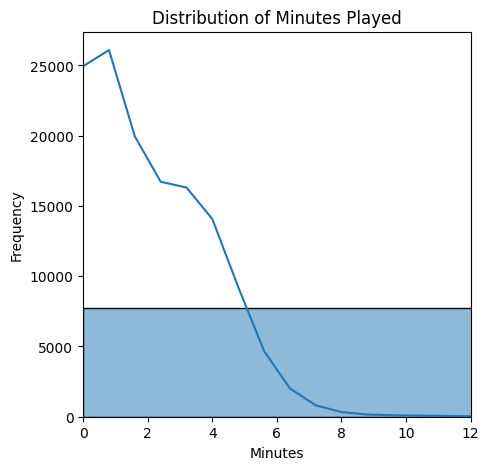

In [108]:
plt.figure(figsize=(5, 5))
sns.histplot(df['minutesPlayed'].unique(), bins=10, kde=True)
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.xlim(0, 12)
plt.show()

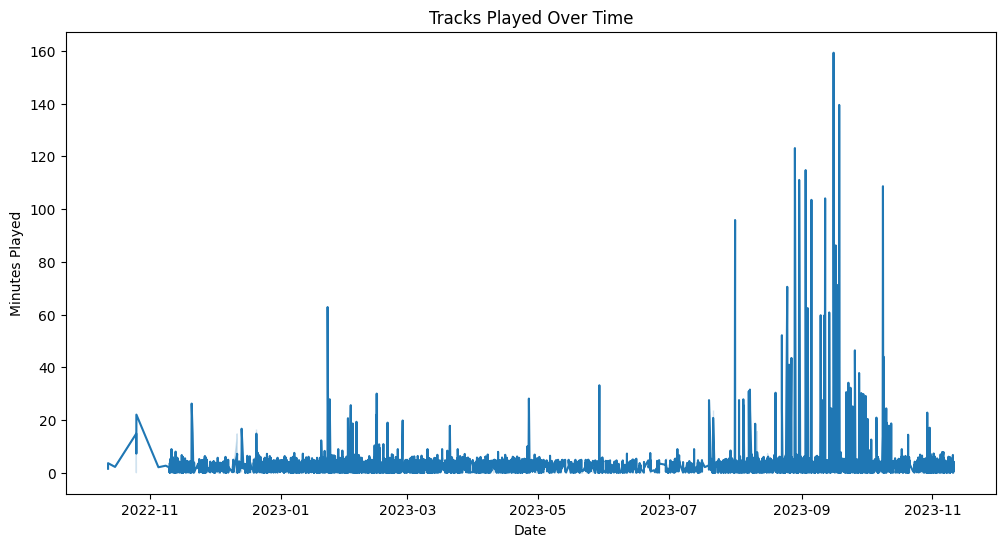

In [90]:
# Convert 'endTime' to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Plot the number of tracks played over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='endTime', y='minutesPlayed', data=df)
plt.title('Tracks Played Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes Played')
plt.show()


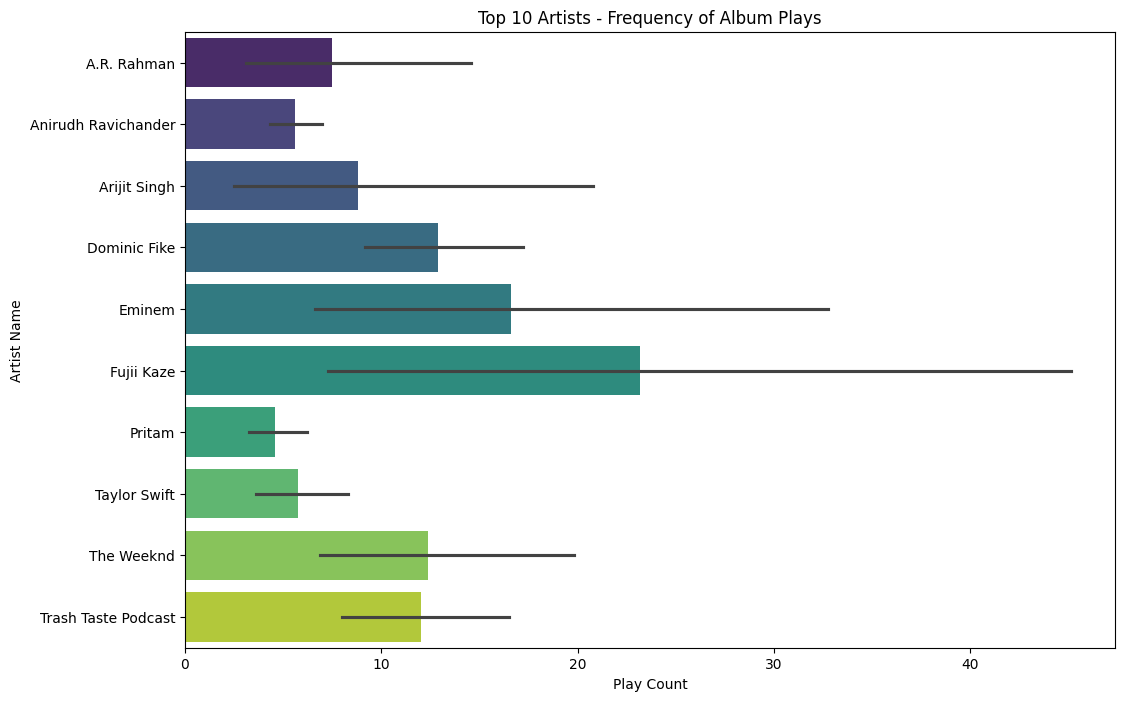

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(x='playCount', y='artistName', data=top_10_data, hue='artistName', palette='viridis', dodge=False)
plt.title('Top 10 Artists - Frequency of Album Plays')
plt.xlabel('Play Count')
plt.ylabel('Artist Name')

plt.show()


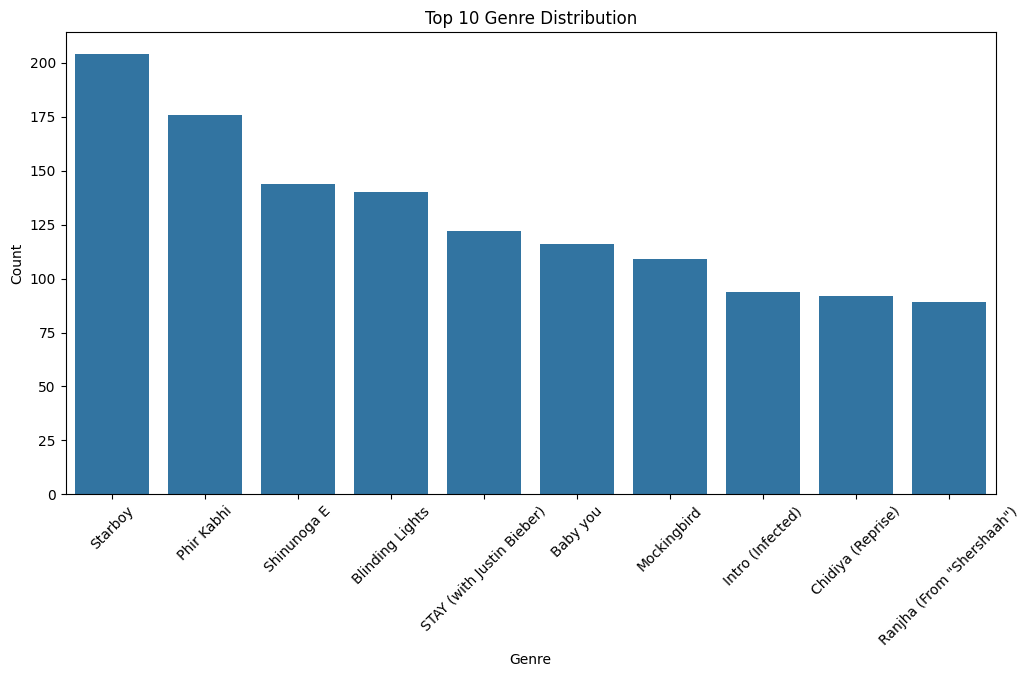

In [93]:
top_10_genres = df['genre'].value_counts().nlargest(10).index
df_top_10_genres = df[df['genre'].isin(top_10_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df_top_10_genres, order=top_10_genres)
plt.title('Top 10 Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\ANANDHAKUMAR\AppData\Local\Temp\ipykernel_19332\1246966348.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_5_songs_by_artists = top_songs_by_artists.groupby('artistName').head(5)


Top 5 Songs from the Top Artists of All Time (Sorted by Total Streams per Artist):
              artistName                                          trackName  \
248           The Weeknd                                            Starboy   
194           The Weeknd                                    Blinding Lights   
241           The Weeknd  Save Your Tears (Remix) (with Ariana Grande) -...   
235           The Weeknd                                           Reminder   
240           The Weeknd                                    Save Your Tears   
105  Anirudh Ravichander                      Vaathi Coming (From "Master")   
37   Anirudh Ravichander                             Hayyoda (From "Jawan")   
50   Anirudh Ravichander                      Kannuladha - The Kiss of Love   
42   Anirudh Ravichander         Hukum - Thalaivar Alappara (From "Jailer")   
34   Anirudh Ravichander                                      Gaali Vaaluga   
146         Dominic Fike                        

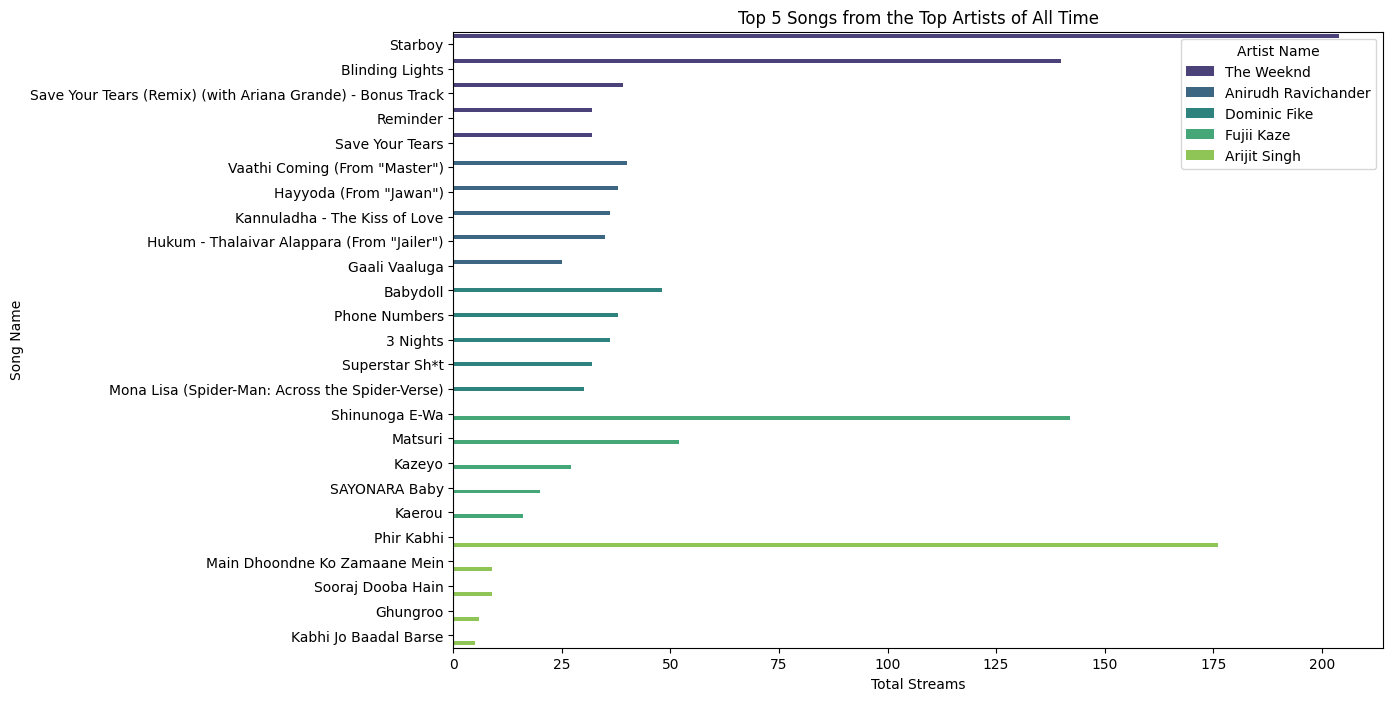

In [94]:
# Getting the names of the top 5 artists of all time in dataset
top_5_artists_all_time = df_stream['artistName'].value_counts().head(5).index.tolist()
top_artists_df = df_stream[df_stream['artistName'].isin(top_5_artists_all_time)]
top_songs_by_artists = top_artists_df.groupby(['artistName', 'trackName']).agg({'msPlayed': 'sum', 'trackName': 'count'})
top_songs_by_artists.rename(columns={'msPlayed': 'Total Minutes', 'trackName': 'Total Streams'}, inplace=True)

top_songs_by_artists.reset_index(inplace=True)
top_songs_by_artists['artistName'] = pd.Categorical(top_songs_by_artists['artistName'], categories=top_5_artists_all_time, ordered=True)


top_songs_by_artists.sort_values(['artistName', 'Total Streams'], ascending=[True, False], inplace=True)
top_5_songs_by_artists = top_songs_by_artists.groupby('artistName').head(5)

print("Top 5 Songs from the Top Artists of All Time (Sorted by Total Streams per Artist):")
print(top_5_songs_by_artists)

# Plotting a bar chart for the top 5 songs
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Streams', y='trackName', hue='artistName', data=top_5_songs_by_artists, palette='viridis', dodge=True)
plt.title('Top 5 Songs from the Top Artists of All Time')
plt.xlabel('Total Streams')
plt.ylabel('Song Name')
plt.legend(title='Artist Name')
plt.show()

Accuracy: 0.90
Classification Report:
                                                 precision    recall  f1-score   support

                                       24kGoldn       1.00      1.00      1.00         1
                                        50 Cent       1.00      1.00      1.00         6
                               7 Years in Tibet       1.00      0.80      0.89         5
                             A Samurai In Tokyo       1.00      1.00      1.00         3
                                      A$AP Ferg       1.00      1.00      1.00         2
                                    A.R. Rahman       0.98      0.96      0.97        46
                                            AJR       1.00      1.00      1.00         2
                                      AMARIA BB       1.00      1.00      1.00         3
                                     AP Dhillon       1.00      1.00      1.00        11
                       ASIAN KUNG-FU GENERATION       0.00      0.00   

C:\Users\ANANDHAKUMAR\OneDrive\Desktop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANANDHAKUMAR\OneDrive\Desktop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANANDHAKUMAR\OneDrive\Desktop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

KeyboardInterrupt: 

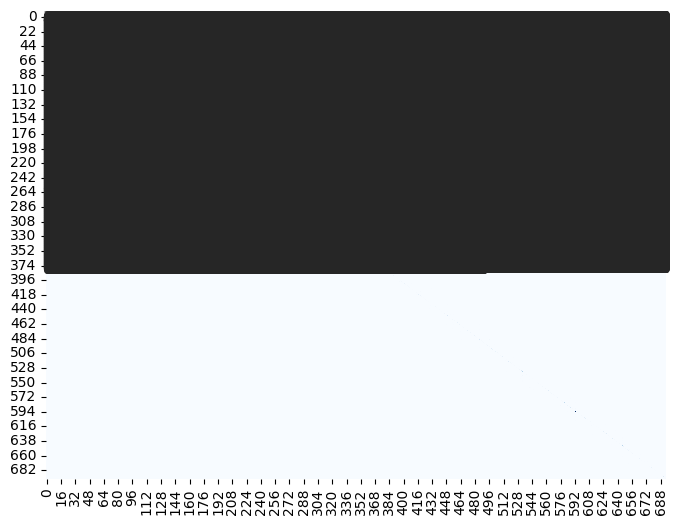

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Extract relevant features from 'endTime'
df_copy['endTime'] = pd.to_datetime(df_copy['endTime'])
df_copy['year'] = df_copy['endTime'].dt.year
df_copy['month'] = df_copy['endTime'].dt.month
df_copy['day'] = df_copy['endTime'].dt.day

# Select features and target variable
# You might need to adjust feature selection based on your dataset
features = ['year', 'month', 'day', 'minutesPlayed']
categorical_features = ['artistName', 'trackName']

X = df_copy[features + categorical_features]
y = df_copy['artistName']  # Replace 'artistName' with the actual target variable

# Use label encoding for categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    X.loc[:,feature] = label_encoder.fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

# Initialize the k-NN classifier (you can experiment with different values of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


